# Flower Image classification using ConvNets

This notebook is heavily inspired by the chapter on convnets from [François Chollet's](https://www.linkedin.com/in/fchollet/ "Linkedin") book : [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

The objective is to train a neural net model in capable of classifying a flower as one of the following 5 classes:
* Daisy
* Dandelion
* Rose
* Sunflower
* Tulip

The dataset is hosted on kaggle ([link](https://www.kaggle.com/alxmamaev/flowers-recognition/data "Flowers")).

As per usual neural nets required lots of computing resources (i.e. GPUs), I used [Google Colab](https://colab.research.google.com/) which is a great tool for testing your models on GPU machines for free in a jupyter notebook-like environment.

For more details on Google Colab see:
* [A cool kaggle discussion channel on google colab](https://www.kaggle.com/getting-started/47096)
* [An excellent article about google colab on medium](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)
* [A short guide for using google colab with fastai tutorials](https://towardsdatascience.com/fast-ai-lesson-1-on-google-colab-free-gpu-d2af89f53604)

...


In [0]:
ls

datalab/


### Create the directory where we'll store the downloaded data

In [0]:
%mkdir data

Let's

In [0]:
ls

data/  datalab/


In [0]:
%cd data/

/content/data


In [0]:
!mkdir data_flowers

In [0]:
ls

data_flowers/


In [0]:
!pip install kaggle

#### Connect to drive and search the file 'kaggle.json', whre my kaggle API credentials are stored

In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

filename = "/content/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)


request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge          8           False  
titanic                                         2020-04-07 00:00:00  Getting Started  Knowledge      11171            True  
house-prices-advanced-regression-techniques     2020-03-01 23:59:00  Getting Started  Knowledge       5245           False  
digit-recognizer                                2020-01-07 00:00:00  Getting Started  Knowledge       2394           False  


In [0]:
!kaggle datasets download -d alxmamaev/flowers-recognition -p ./

flowers-recognition.zip: Downloaded 225MB of 225MB


In [0]:
ls

data_flowers/  flowers-recognition.zip  flowers.zip


In [0]:
!rm flowers.zip
!unzip flowers-recognition.zip -d ./

Archive:  flowers-recognition.zip
  inflating: ./flowers.zip           


In [0]:
ls 

data_flowers/  flowers-recognition.zip  flowers.zip


In [0]:
!unzip flowers.zip -d ./

Archive:  flowers.zip
   creating: ./flowers/
   creating: ./flowers/daisy/
  inflating: ./flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: ./flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: ./flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: ./flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: ./flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: ./flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: ./flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: ./flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: ./flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: ./flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: ./flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: ./flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: ./flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: ./flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: ./flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: ./flowers/daisy/10555815624_dc21


  inflating: ./flowers/daisy/4538877108_3c793f7987_m.jpg  
  inflating: ./flowers/daisy/4540555191_3254dc4608_n.jpg  
  inflating: ./flowers/daisy/4544110929_a7de65d65f_n.jpg  
  inflating: ./flowers/daisy/4561871220_47f420ca59_m.jpg  
 extracting: ./flowers/daisy/4563059851_45a9d21a75.jpg  
  inflating: ./flowers/daisy/4565255237_9ba29c4d4e_n.jpg  
  inflating: ./flowers/daisy/4581199679_867652c3f1_n.jpg  
  inflating: ./flowers/daisy/4584890753_14ea24a619_n.jpg  
  inflating: ./flowers/daisy/4598422221_b37313a3e3_n.jpg  
  inflating: ./flowers/daisy/4610018126_21f438d2dc_m.jpg  
  inflating: ./flowers/daisy/4613992315_143ccc2a10_m.jpg  
  inflating: ./flowers/daisy/4654579740_6671a53627_m.jpg  
  inflating: ./flowers/daisy/4657354814_f368762c53_m.jpg  
  inflating: ./flowers/daisy/4666648087_b10f376f19.jpg  
  inflating: ./flowers/daisy/4668543441_79040ca329_n.jpg  
  inflating: ./flowers/daisy/4669117051_ce61e91b76.jpg  
  inflating: ./flowers/daisy/4683997791_56e7d3c03c_n.jpg  
  

  inflating: ./flowers/dandelion/16987075_9a690a2183.jpg  
  inflating: ./flowers/dandelion/17020815734_81e8db8008_m.jpg  
  inflating: ./flowers/dandelion/17029965300_8e755c2214_n.jpg  
  inflating: ./flowers/dandelion/17047231499_bd66c23641.jpg  
  inflating: ./flowers/dandelion/17047385027_8fd510e164_n.jpg  
  inflating: ./flowers/dandelion/17075803866_aeeded2637.jpg  
  inflating: ./flowers/dandelion/17077940105_d2cd7b9ec4_n.jpg  
  inflating: ./flowers/dandelion/17080000869_a80e767f4a_m.jpg  
  inflating: ./flowers/dandelion/17095758258_a33642946f_n.jpg  
  inflating: ./flowers/dandelion/17122969189_0ec37cb6c9.jpg  
  inflating: ./flowers/dandelion/17135145776_4c2ec21b05_m.jpg  
  inflating: ./flowers/dandelion/17146644679_11aff3045c.jpg  
  inflating: ./flowers/dandelion/17147436650_c94ae24004_n.jpg  
  inflating: ./flowers/dandelion/17161833794_e1d92259d2_m.jpg  
  inflating: ./flowers/dandelion/17175932454_c052e205c1_n.jpg  
  inflating: ./flowers/dandelion/17189437699_a9171b6a

 extracting: ./flowers/dandelion/4336536446_e635f48f2e.jpg  
  inflating: ./flowers/dandelion/4489359360_09db62f825.jpg  
 extracting: ./flowers/dandelion/4496277750_8c34256e28.jpg  
  inflating: ./flowers/dandelion/4500964841_b1142b50fb_n.jpg  
  inflating: ./flowers/dandelion/4510350093_3700064215.jpg  
  inflating: ./flowers/dandelion/4510938552_6f7bae172a_n.jpg  
  inflating: ./flowers/dandelion/4512569988_2b3f802cc6.jpg  
  inflating: ./flowers/dandelion/4514343281_26781484df.jpg  
  inflating: ./flowers/dandelion/451965300_619b781dc9_m.jpg  
  inflating: ./flowers/dandelion/4523239455_9c31a06aaf_n.jpg  
  inflating: ./flowers/dandelion/4523862714_b41b459c88.jpg  
  inflating: ./flowers/dandelion/4528742654_99d233223b_m.jpg  
  inflating: ./flowers/dandelion/4530848609_02a1d9b791.jpg  
  inflating: ./flowers/dandelion/4550784336_584d7a65de_m.jpg  
  inflating: ./flowers/dandelion/4552571121_2677bcdec3.jpg  
  inflating: ./flowers/dandelion/4552591312_02fe1dcc04_n.jpg  
  inflating


 extracting: ./flowers/rose/1469726748_f359f4a8c5.jpg  
  inflating: ./flowers/rose/14747962886_2bff6bb323_m.jpg  
  inflating: ./flowers/rose/14810868100_87eb739f26_m.jpg  
  inflating: ./flowers/rose/1485142251_ca89254442.jpg  
  inflating: ./flowers/rose/14870567200_80cda4362e_n.jpg  
  inflating: ./flowers/rose/14880561916_79aeb812fd_n.jpg  
  inflating: ./flowers/rose/14943194730_f48b4d4547_n.jpg  
  inflating: ./flowers/rose/14970973709_968910640e_n.jpg  
  inflating: ./flowers/rose/14982802401_a3dfb22afb.jpg  
 extracting: ./flowers/rose/14993880427_95d0f27257.jpg  
  inflating: ./flowers/rose/15011625580_7974c44bce.jpg  
  inflating: ./flowers/rose/15032112248_30c5284e54_n.jpg  
  inflating: ./flowers/rose/15060816740_68e1b2c31b.jpg  
  inflating: ./flowers/rose/15061894841_e5aca59ecd_n.jpg  
  inflating: ./flowers/rose/15094168139_8f636ffa1d_n.jpg  
  inflating: ./flowers/rose/15174615529_144ae28bdb_n.jpg  
  inflating: ./flowers/rose/15184419268_7230e9728e.jpg  
  inflating:


  inflating: ./flowers/rose/5694071486_90c2b1aee5_n.jpg  
  inflating: ./flowers/rose/5694090698_1f0c218250_n.jpg  
  inflating: ./flowers/rose/5717319579_190e85c7d1_m.jpg  
  inflating: ./flowers/rose/5721768347_2ec4d2247b_n.jpg  
  inflating: ./flowers/rose/5731750490_ba3325b7ee_n.jpg  
  inflating: ./flowers/rose/5736328472_8f25e6f6e7.jpg  
  inflating: ./flowers/rose/5777669976_a205f61e5b.jpg  
 extracting: ./flowers/rose/5799616059_0ffda02e54.jpg  
  inflating: ./flowers/rose/5835539224_75967fc400_m.jpg  
  inflating: ./flowers/rose/5863698305_04a4277401_n.jpg  
  inflating: ./flowers/rose/5897035797_e67bf68124_n.jpg  
  inflating: ./flowers/rose/5960270643_1b8a94822e_m.jpg  
  inflating: ./flowers/rose/5961803532_9368212949_m.jpg  
  inflating: ./flowers/rose/5979193298_639e877248.jpg  
  inflating: ./flowers/rose/5990626258_697f007308_n.jpg  
  inflating: ./flowers/rose/6053143173_991c011b23.jpg  
  inflating: ./flowers/rose/6108118824_5b0231a56d.jpg  
  inflating: ./flowers/ro


  inflating: ./flowers/sunflower/22183529245_ce13557515_m.jpg  
  inflating: ./flowers/sunflower/22203670478_9ec5c2700b_n.jpg  
  inflating: ./flowers/sunflower/22255608949_172d7c8d22_m.jpg  
  inflating: ./flowers/sunflower/22405882322_d4561f8469_n.jpg  
  inflating: ./flowers/sunflower/22405887122_75eda1872f_m.jpg  
  inflating: ./flowers/sunflower/22416421196_caf131c9fa_m.jpg  
  inflating: ./flowers/sunflower/22419079265_8902cddb7d_n.jpg  
  inflating: ./flowers/sunflower/22429146402_332fa2fc72_m.jpg  
  inflating: ./flowers/sunflower/22429946721_e17a12cb39_n.jpg  
  inflating: ./flowers/sunflower/22478719251_276cb094f9_n.jpg  
  inflating: ./flowers/sunflower/22686342422_c0b9e2f38e.jpg  
  inflating: ./flowers/sunflower/22992257000_76dbc599e7_m.jpg  
  inflating: ./flowers/sunflower/2307673262_e1e1aefd29.jpg  
  inflating: ./flowers/sunflower/23204123212_ef32fbafbe.jpg  
  inflating: ./flowers/sunflower/23247483352_0defc7a6dc_n.jpg  
  inflating: ./flowers/sunflower/2328600790_90

  inflating: ./flowers/sunflower/8234846550_fdaf326dbe.jpg  
  inflating: ./flowers/sunflower/8249000137_eddfffa380_n.jpg  
  inflating: ./flowers/sunflower/8265023280_713f2c69d0_m.jpg  
  inflating: ./flowers/sunflower/8266310743_02095e782d_m.jpg  
  inflating: ./flowers/sunflower/8292914969_4a76608250_m.jpg  
  inflating: ./flowers/sunflower/8368015811_2893411cf7_n.jpg  
  inflating: ./flowers/sunflower/8433716268_8b7b4083bc_n.jpg  
  inflating: ./flowers/sunflower/8478248531_1a16e232b5.jpg  
  inflating: ./flowers/sunflower/8480886751_71d88bfdc0_n.jpg  
  inflating: ./flowers/sunflower/8481979626_98c9f88848_n.jpg  
  inflating: ./flowers/sunflower/8543642705_b841b0e5f6.jpg  
  inflating: ./flowers/sunflower/8563099326_8be9177101.jpg  
  inflating: ./flowers/sunflower/857698097_8068a2c135_n.jpg  
  inflating: ./flowers/sunflower/864957037_c75373d1c5.jpg  
  inflating: ./flowers/sunflower/8705462313_4458d64cd4.jpg  
  inflating: ./flowers/sunflower/877083343_e3338c4125.jpg  
 extracti


  inflating: ./flowers/tulip/16862351376_f0fcc6fc91_n.jpg  
  inflating: ./flowers/tulip/16862374316_4135908d4c_m.jpg  
  inflating: ./flowers/tulip/16862422576_5226e8d1d0.jpg  
  inflating: ./flowers/tulip/16904202259_8f45d045c3_m.jpg  
  inflating: ./flowers/tulip/16907559551_05ded87fb2_n.jpg  
  inflating: ./flowers/tulip/16930105456_8b826dc4a8_n.jpg  
  inflating: ./flowers/tulip/16930121391_a4092ecf00_n.jpg  
  inflating: ./flowers/tulip/16937554595_3e1de22f9c.jpg  
  inflating: ./flowers/tulip/16938892686_3613ea68e8_n.jpg  
  inflating: ./flowers/tulip/16951623209_00fb7ec1b1_n.jpg  
  inflating: ./flowers/tulip/16986144192_55e0e6c152.jpg  
  inflating: ./flowers/tulip/17012955700_7141d29eee.jpg  
  inflating: ./flowers/tulip/17066862602_7530f21efe.jpg  
  inflating: ./flowers/tulip/17066864992_1cbc4fc908.jpg  
  inflating: ./flowers/tulip/17078576150_6f272ce73f_n.jpg  
  inflating: ./flowers/tulip/17078716890_68e0723389_n.jpg  
  inflating: ./flowers/tulip/17094167287_865840060d


 extracting: ./flowers/tulip/6931708704_fccb06fea8.jpg  
  inflating: ./flowers/tulip/6931715360_34edc5a372_m.jpg  
 extracting: ./flowers/tulip/6931748252_68f06086b3.jpg  
  inflating: ./flowers/tulip/6934951920_d43ff8b78d.jpg  
  inflating: ./flowers/tulip/6936168062_a31c28b77c_m.jpg  
  inflating: ./flowers/tulip/6948277038_89d7ff42e2_m.jpg  
  inflating: ./flowers/tulip/6958243974_8851425ddb_n.jpg  
  inflating: ./flowers/tulip/6958342976_a4a9483488_n.jpg  
  inflating: ./flowers/tulip/6958343928_7e596da4ed_m.jpg  
  inflating: ./flowers/tulip/6970683464_f70838ca3a_n.jpg  
  inflating: ./flowers/tulip/6982913043_3b873c6a25.jpg  
  inflating: ./flowers/tulip/6989946990_62c639ff16_n.jpg  
  inflating: ./flowers/tulip/6994351792_343e18cbf6_n.jpg  
  inflating: ./flowers/tulip/6998661030_46cbb7892a.jpg  
 extracting: ./flowers/tulip/7002703410_3e97b29da5_n.jpg  
  inflating: ./flowers/tulip/7003964080_4566470798_n.jpg  
 extracting: ./flowers/tulip/7042692841_f323799c0d.jpg  
  inflat

In [0]:
import os, shutil

In [0]:
print("# of daisy",len(os.listdir('flowers/daisy/')))
print("# of dandelion",len(os.listdir('flowers/dandelion/')))
print("# of rose",len(os.listdir('flowers/rose/')))
print("# of sunflower",len(os.listdir('flowers/sunflower/')))
print("# of tulip",len(os.listdir('flowers/tulip/')))

# of daisy 769
# of dandelion 1055
# of rose 784
# of sunflower 734
# of tulip 984


In [0]:
ls flowers/

daisy/  dandelion/  rose/  sunflower/  tulip/


### Splitting data into train, validation and test sets

In [0]:
original_dataset_dir = 'flowers'
base_dir = 'data_flowers'
if not os.path.exists(base_dir): os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir): os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir): os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir): os.mkdir(test_dir)

##Training directories
train_daisy_dir = os.path.join(train_dir, 'daisy')
if not os.path.exists(train_daisy_dir): os.mkdir(train_daisy_dir)

train_dandelion_dir = os.path.join(train_dir, 'dandelion')
if not os.path.exists(train_dandelion_dir): os.mkdir(train_dandelion_dir)

train_rose_dir = os.path.join(train_dir, 'rose')
if not os.path.exists(train_rose_dir): os.mkdir(train_rose_dir)

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
if not os.path.exists(train_sunflower_dir): os.mkdir(train_sunflower_dir)

train_tulip_dir = os.path.join(train_dir, 'tulip')
if not os.path.exists(train_tulip_dir): os.mkdir(train_tulip_dir)

##Valid dirs

validation_daisy_dir = os.path.join(validation_dir, 'daisy')
if not os.path.exists(validation_daisy_dir): os.mkdir(validation_daisy_dir)

validation_dandelion_dir = os.path.join(validation_dir, 'dandelion')
if not os.path.exists(validation_dandelion_dir): os.mkdir(validation_dandelion_dir)

validation_rose_dir = os.path.join(validation_dir, 'rose')
if not os.path.exists(validation_rose_dir): os.mkdir(validation_rose_dir)

validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
if not os.path.exists(validation_sunflower_dir): os.mkdir(validation_sunflower_dir)

validation_tulip_dir = os.path.join(validation_dir, 'tulip')
if not os.path.exists(validation_tulip_dir): os.mkdir(validation_tulip_dir)


##test dirs
test_daisy_dir = os.path.join(test_dir, 'daisy')
if not os.path.exists(test_daisy_dir): os.mkdir(test_daisy_dir)

test_dandelion_dir = os.path.join(test_dir, 'dandelion')
if not os.path.exists(test_dandelion_dir): os.mkdir(test_dandelion_dir)

test_rose_dir = os.path.join(test_dir, 'rose')
if not os.path.exists(test_rose_dir): os.mkdir(test_rose_dir)

test_sunflower_dir = os.path.join(test_dir, 'sunflower')
if not os.path.exists(test_sunflower_dir): os.mkdir(test_sunflower_dir)

test_tulip_dir = os.path.join(test_dir, 'tulip')
if not os.path.exists(test_tulip_dir): os.mkdir(test_tulip_dir)


In [0]:
ls data_flowers

test/  train/  validation/


In [0]:
ls data_flowers/test/

daisy/  dandelion/  rose/  sunflower/  tulip/


In [0]:
## Training set proportion
prop = 0.7

In [0]:
from random import shuffle
for flower_class in os.listdir('flowers'):
    dist_train = 'data_flowers/train/'+flower_class+'/'
    dist_val = 'data_flowers/validation/'+flower_class+'/'
    dist_test = 'data_flowers/test/'+flower_class+'/'
    flower_img = os.listdir('flowers/'+flower_class)
    shuffle(flower_img)
    size_class = int(len(flower_img)*prop)
    img_train = flower_img[:size_class]
    img_val = flower_img[size_class: int(len(flower_img)*(prop+0.2))]
    img_test = flower_img[int(len(flower_img)*(prop+0.2)):]
    for img in img_train:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_train)
    for img in img_val:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_val)
    for img in img_test:
      if '.jpg' in img:
        shutil.copy('flowers/'+flower_class+'/'+img, dist_test)

In [0]:
#ls data_flowers/test/dandelion/

In [0]:
print("# daisy train:",len(os.listdir(train_daisy_dir)))
print("# daisy test:",len(os.listdir(test_daisy_dir)))
print("# daisy val:",len(os.listdir(validation_daisy_dir)))

# daisy train: 538
# daisy test: 77
# daisy val: 154


In [0]:
print("# dandelion train:",len(os.listdir(train_dandelion_dir)))
print("# dandelion test:",len(os.listdir(test_dandelion_dir)))
print("# dandelion val:",len(os.listdir(validation_dandelion_dir)))

# dandelion train: 735
# dandelion test: 106
# dandelion val: 211


In [0]:
print("# rose train:",len(os.listdir(train_rose_dir)))
print("# rose test:",len(os.listdir(test_rose_dir)))
print("# rose val:",len(os.listdir(validation_rose_dir)))

# rose train: 548
# rose test: 79
# rose val: 157


In [0]:
print("# sunflower train:",len(os.listdir(train_sunflower_dir)))
print("# sunflower test:",len(os.listdir(test_sunflower_dir)))
print("# sunflower val:",len(os.listdir(validation_sunflower_dir)))

# sunflower train: 513
# sunflower test: 74
# sunflower val: 147


In [0]:
print("# tulip train:",len(os.listdir(train_tulip_dir)))
print("# tulip test:",len(os.listdir(test_tulip_dir)))
print("# tulip val:",len(os.listdir(validation_tulip_dir)))

# tulip train: 688
# tulip test: 99
# tulip val: 197


### Plotting some sample flowers

In [0]:
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy import misc
from scipy.misc.pilutil import imread, imresize, imsave

input_shape = (224, 224)

def plot_examples(path):
    print('Images belonging to class:', path)
    listdir = os.listdir(path)
    fig, ax = plt.subplots(nrows=2,ncols=5,figsize=(20,10))
    ax = ax.ravel()
    for idx, e in enumerate(listdir[:10]):
        img = imread(os.path.join(path, e))
        img = imresize(img,input_shape)
        ax[idx].imshow(img)

Images belonging to class: data_flowers/test/daisy


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


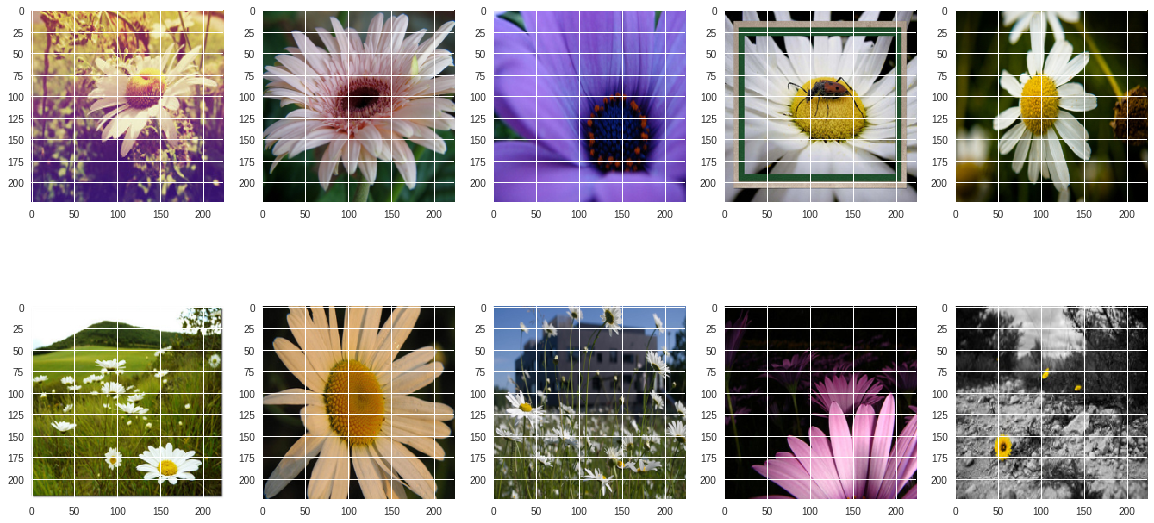

In [0]:
plot_examples(test_daisy_dir)

Images belonging to class: data_flowers/test/dandelion


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


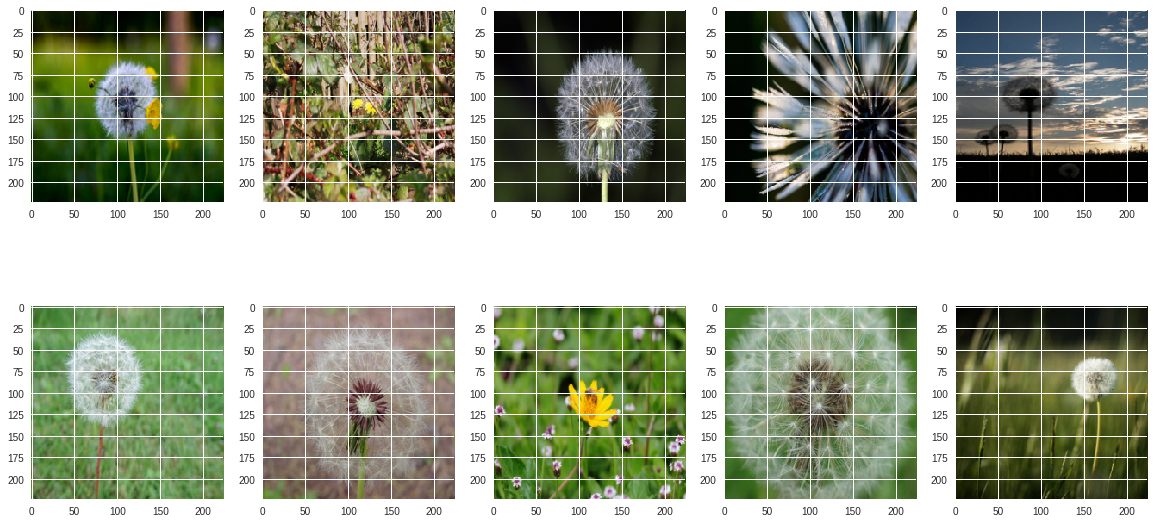

In [0]:
plot_examples(test_dandelion_dir)

Images belonging to class: data_flowers/test/rose


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


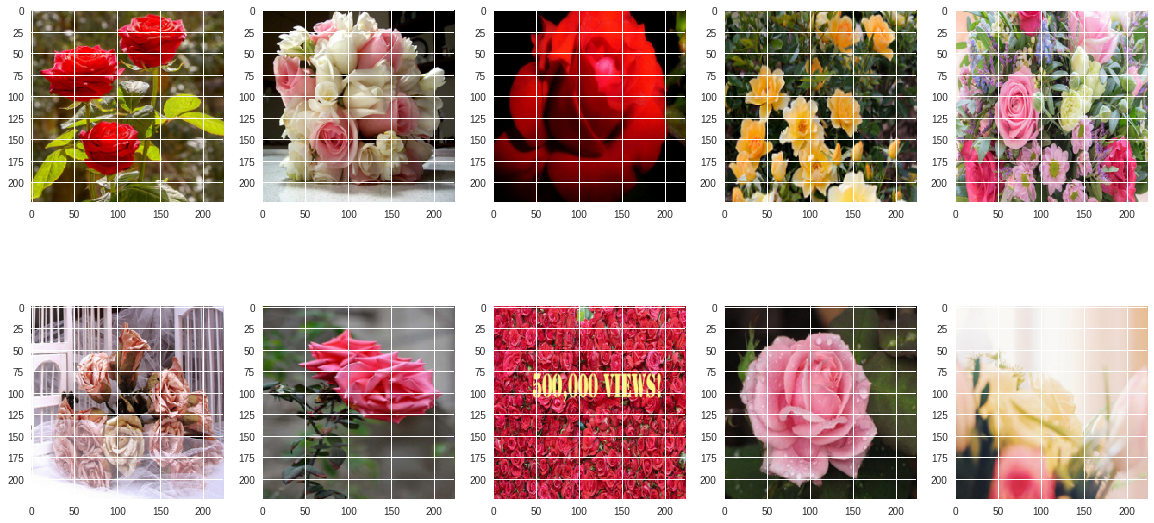

In [0]:
plot_examples(test_rose_dir)

Images belonging to class: data_flowers/test/sunflower


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


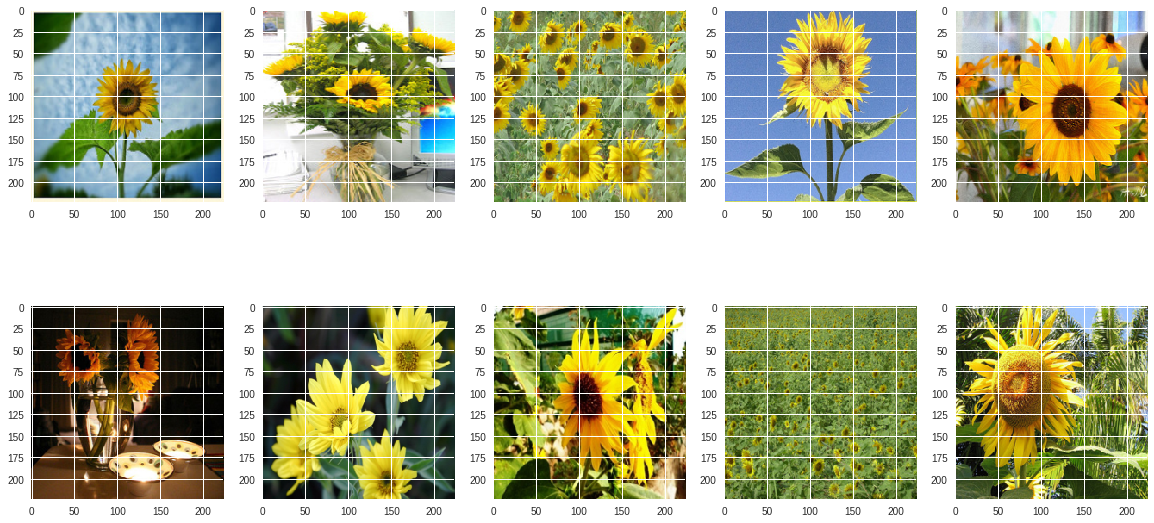

In [0]:
plot_examples(test_sunflower_dir)

Images belonging to class: data_flowers/test/tulip


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


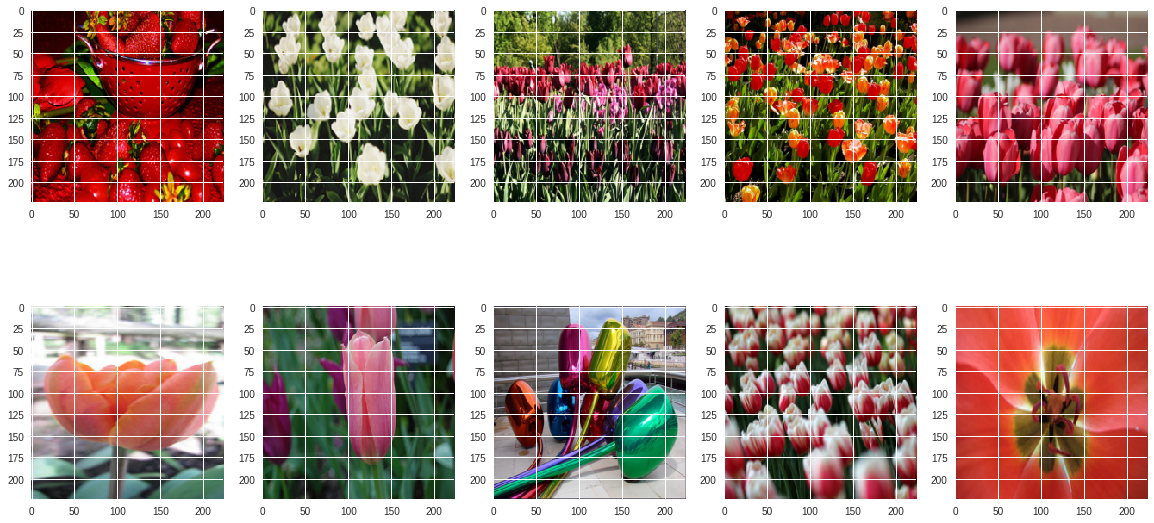

In [0]:
plot_examples(test_tulip_dir)

### Instantiating a small convnet for classification

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory( train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20, 
                                                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory( validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=20,
                                                        class_mode='categorical')

Found 3022 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [0]:
from keras.callbacks import ModelCheckpoint

### Connect and mount the googledrive directory on colab

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p /drive
!google-drive-ocamlfuse /drive

In [0]:
if not os.path.exists('/drive/DeepLearning/flowers'):
  os.mkdir('/drive/DeepLearning/flowers')

In [0]:
ls /drive/DeepLearning/

fastai/                       test_labels_from_vgg16.npy
flowers/                      train_features_from_vgg16.npy
flowers_classif.ipynb         train_labels_from_vgg16.npy
flowers_classif_v2.ipynb      validation_features_from_vgg16.npy
test_fastai.ipynb             validation_labels_from_vgg16.npy
test_features_from_vgg16.npy


In [0]:
if not os.path.exists('/drive/DeepLearning/flowers/baseline_models'):
  os.mkdir('/drive/DeepLearning/flowers/baseline_models')
  
filepath = '/drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50,
                             callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 16s 156ms/step - loss: 1.4462 - acc: 0.3510 - val_loss: 1.2183 - val_acc: 0.5020

Epoch 00001: val_acc improved from -inf to 0.50203, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_01_0.50.hdf5
Epoch 2/30
100/100 [==============================] - 14s 136ms/step - loss: 1.1944 - acc: 0.5180 - val_loss: 1.1246 - val_acc: 0.5325

Epoch 00002: val_acc improved from 0.50203 to 0.53245, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_02_0.53.hdf5
Epoch 3/30
 69/100 [===================>..........] - ETA: 3s - loss: 1.1296 - acc: 0.5377

100/100 [==============================] - 13s 133ms/step - loss: 1.1034 - acc: 0.5520 - val_loss: 1.1177 - val_acc: 0.5294

Epoch 00003: val_acc did not improve from 0.53245
Epoch 4/30
100/100 [==============================] - 13s 133ms/step - loss: 1.0157 - acc: 0.6005 - val_loss: 1.0469 - val_acc: 0.5842

Epoch 00004: val_acc improved from 0.53245 to 0.58418, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_04_0.58.hdf5
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.9483 - acc: 0.6225 - val_loss: 1.1273 - val_acc: 0.5477

Epoch 00005: val_acc did not improve from 0.58418
Epoch 6/30
 16/100 [===>..........................] - ETA: 8s - loss: 0.8788 - acc: 0.6813

100/100 [==============================] - 13s 131ms/step - loss: 0.9141 - acc: 0.6500 - val_loss: 0.9704 - val_acc: 0.6258

Epoch 00006: val_acc improved from 0.58418 to 0.62576, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_06_0.63.hdf5
Epoch 7/30
100/100 [==============================] - 13s 132ms/step - loss: 0.8337 - acc: 0.6900 - val_loss: 1.0373 - val_acc: 0.5984

Epoch 00007: val_acc did not improve from 0.62576
Epoch 8/30
 94/100 [===========================>..] - ETA: 0s - loss: 0.7589 - acc: 0.7186

100/100 [==============================] - 13s 133ms/step - loss: 0.7614 - acc: 0.7160 - val_loss: 0.9437 - val_acc: 0.6420

Epoch 00008: val_acc improved from 0.62576 to 0.64199, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_08_0.64.hdf5
Epoch 9/30
100/100 [==============================] - 13s 133ms/step - loss: 0.7579 - acc: 0.7090 - val_loss: 0.9531 - val_acc: 0.6318

Epoch 00009: val_acc did not improve from 0.64199
Epoch 10/30
 95/100 [===========================>..] - ETA: 0s - loss: 0.6917 - acc: 0.7405

100/100 [==============================] - 13s 132ms/step - loss: 0.6866 - acc: 0.7415 - val_loss: 0.9880 - val_acc: 0.6176

Epoch 00010: val_acc did not improve from 0.64199
Epoch 11/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6207 - acc: 0.7705 - val_loss: 1.0080 - val_acc: 0.6237

Epoch 00011: val_acc did not improve from 0.64199
Epoch 12/30
100/100 [==============================] - 13s 131ms/step - loss: 0.5670 - acc: 0.7910 - val_loss: 1.0282 - val_acc: 0.6095

Epoch 00012: val_acc did not improve from 0.64199
Epoch 13/30
 37/100 [==========>...................] - ETA: 6s - loss: 0.5966 - acc: 0.7919

100/100 [==============================] - 13s 132ms/step - loss: 0.5252 - acc: 0.8085 - val_loss: 0.9717 - val_acc: 0.6430

Epoch 00013: val_acc improved from 0.64199 to 0.64300, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_13_0.64.hdf5
Epoch 14/30
100/100 [==============================] - 14s 136ms/step - loss: 0.4709 - acc: 0.8365 - val_loss: 1.0747 - val_acc: 0.6329

Epoch 00014: val_acc did not improve from 0.64300
Epoch 15/30
 98/100 [============================>.] - ETA: 0s - loss: 0.4088 - acc: 0.8490

100/100 [==============================] - 13s 132ms/step - loss: 0.4116 - acc: 0.8485 - val_loss: 1.0404 - val_acc: 0.6258

Epoch 00015: val_acc did not improve from 0.64300
Epoch 16/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3498 - acc: 0.8780 - val_loss: 1.1587 - val_acc: 0.6166

Epoch 00016: val_acc did not improve from 0.64300
Epoch 17/30
100/100 [==============================] - 13s 132ms/step - loss: 0.3160 - acc: 0.8990 - val_loss: 1.2803 - val_acc: 0.6187

Epoch 00017: val_acc did not improve from 0.64300
Epoch 18/30
 37/100 [==========>...................] - ETA: 6s - loss: 0.2681 - acc: 0.9068

100/100 [==============================] - 13s 131ms/step - loss: 0.2738 - acc: 0.9070 - val_loss: 1.3189 - val_acc: 0.6268

Epoch 00018: val_acc did not improve from 0.64300
Epoch 19/30
100/100 [==============================] - 13s 132ms/step - loss: 0.2485 - acc: 0.9205 - val_loss: 1.1884 - val_acc: 0.6400

Epoch 00019: val_acc did not improve from 0.64300
Epoch 20/30
100/100 [==============================] - 13s 133ms/step - loss: 0.1882 - acc: 0.9360 - val_loss: 1.3633 - val_acc: 0.6562

Epoch 00020: val_acc improved from 0.64300 to 0.65619, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_no_reg_no_data_aug_20_0.66.hdf5
Epoch 21/30
 23/100 [=====>........................] - ETA: 8s - loss: 0.1302 - acc: 0.9543

100/100 [==============================] - 13s 133ms/step - loss: 0.1627 - acc: 0.9420 - val_loss: 1.3943 - val_acc: 0.6237

Epoch 00021: val_acc did not improve from 0.65619
Epoch 22/30
100/100 [==============================] - 13s 133ms/step - loss: 0.1198 - acc: 0.9670 - val_loss: 1.5120 - val_acc: 0.6298

Epoch 00022: val_acc did not improve from 0.65619
Epoch 23/30
100/100 [==============================] - 13s 133ms/step - loss: 0.1156 - acc: 0.9655 - val_loss: 1.5652 - val_acc: 0.6369

Epoch 00023: val_acc did not improve from 0.65619
Epoch 24/30
 22/100 [=====>........................] - ETA: 7s - loss: 0.1170 - acc: 0.9636

100/100 [==============================] - 13s 132ms/step - loss: 0.0964 - acc: 0.9700 - val_loss: 1.6794 - val_acc: 0.6258

Epoch 00024: val_acc did not improve from 0.65619
Epoch 25/30
100/100 [==============================] - 13s 132ms/step - loss: 0.0862 - acc: 0.9750 - val_loss: 1.9590 - val_acc: 0.6187

Epoch 00025: val_acc did not improve from 0.65619
Epoch 26/30
100/100 [==============================] - 13s 134ms/step - loss: 0.0736 - acc: 0.9795 - val_loss: 1.6973 - val_acc: 0.6227

Epoch 00026: val_acc did not improve from 0.65619
Epoch 27/30
 26/100 [======>.......................] - ETA: 7s - loss: 0.0365 - acc: 0.9923

100/100 [==============================] - 13s 132ms/step - loss: 0.0612 - acc: 0.9795 - val_loss: 1.7269 - val_acc: 0.6288

Epoch 00027: val_acc did not improve from 0.65619
Epoch 28/30
100/100 [==============================] - 13s 133ms/step - loss: 0.0475 - acc: 0.9845 - val_loss: 1.9657 - val_acc: 0.6247

Epoch 00028: val_acc did not improve from 0.65619
Epoch 29/30
100/100 [==============================] - 14s 135ms/step - loss: 0.0512 - acc: 0.9870 - val_loss: 2.1121 - val_acc: 0.5903

Epoch 00029: val_acc did not improve from 0.65619
Epoch 30/30
 23/100 [=====>........................] - ETA: 7s - loss: 0.0975 - acc: 0.9717

100/100 [==============================] - 13s 132ms/step - loss: 0.0487 - acc: 0.9860 - val_loss: 1.9920 - val_acc: 0.6258

Epoch 00030: val_acc did not improve from 0.65619


In [0]:
import matplotlib.pyplot as plt

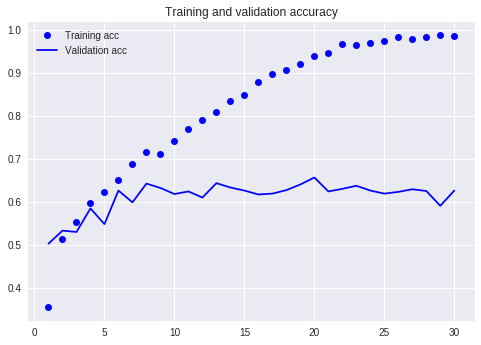

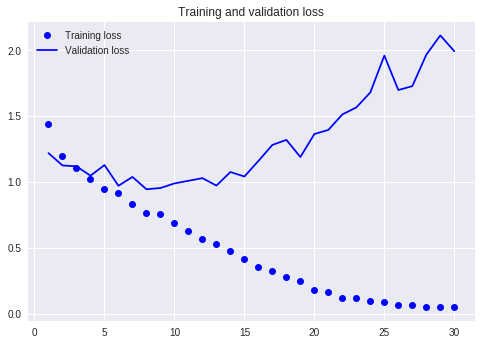

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Data augmentation and dropout regularization

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

NameError: ignored

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 3022 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [0]:
  
filepath = '/drive/DeepLearning/flowers/baseline_models/baseline_dropout_and_data_aug_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=30,
    callbacks=callbacks_list)

Epoch 1/100
100/100 [==============================] - 55s 555ms/step - loss: 1.3532 - acc: 0.4108 - val_loss: 1.1504 - val_acc: 0.5290

Epoch 00001: val_acc improved from -inf to 0.52903, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_dropout_and_data_aug_01_0.53.hdf5
Epoch 2/100
100/100 [==============================] - 52s 523ms/step - loss: 1.1643 - acc: 0.5217 - val_loss: 1.1634 - val_acc: 0.5419

Epoch 00002: val_acc improved from 0.52903 to 0.54194, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_dropout_and_data_aug_02_0.54.hdf5
Epoch 3/100
 75/100 [=====================>........] - ETA: 11s - loss: 1.1064 - acc: 0.5588

100/100 [==============================] - 53s 530ms/step - loss: 1.0974 - acc: 0.5628 - val_loss: 1.1124 - val_acc: 0.5903

Epoch 00003: val_acc improved from 0.54194 to 0.59032, saving model to /drive/DeepLearning/flowers/baseline_models/baseline_dropout_and_data_aug_03_0.59.hdf5
Epoch 4/100
 77/100 [======================>.......] - ETA: 10s - loss: 1.0467 - acc: 0.5753

#### Visualize loss and accuracy accross epochs

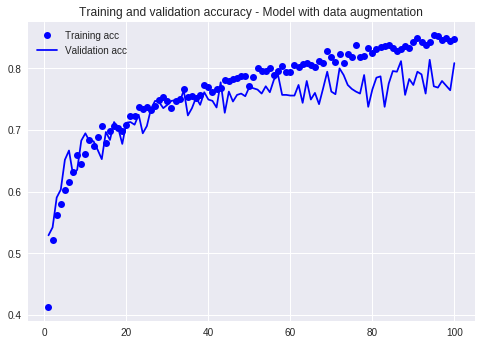

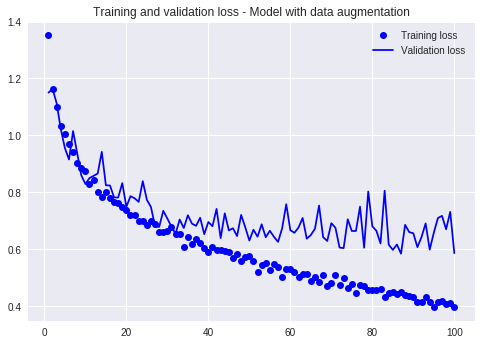

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy - Model with data augmentation')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss - Model with data augmentation')
plt.legend()
plt.show()

## Transfer learning with VGG16

### Features extraction only, with no data augmentation
In this scenario, we use only earlier layers, i.e. the convolutional ones, and apply them to our data in order to extract meaningful features.
These extracted features are then fed into a newy trained classifier to predict the class of the flower.

First, load the VGG16 pre-trained model from Keras

In [0]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

##### Extracting features from vgg16

In [0]:
import numpy as np

In [0]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [0]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 7, 7, 512))
  labels = np.zeros(shape=(sample_count, 5))
  generator = datagen.flow_from_directory(directory,
                                          target_size=(224, 224),
                                          batch_size=batch_size,
                                          class_mode='categorical')
  i=0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

In [0]:
train_size = len(os.listdir(train_daisy_dir)) + len(os.listdir(train_dandelion_dir)) + \
len(os.listdir(train_rose_dir)) + len(os.listdir(train_sunflower_dir)) + \
len(os.listdir(train_tulip_dir))

test_size = len(os.listdir(test_daisy_dir)) + len(os.listdir(test_dandelion_dir)) + \
len(os.listdir(test_rose_dir)) + len(os.listdir(test_sunflower_dir)) + \
len(os.listdir(test_tulip_dir))

validation_size = len(os.listdir(validation_daisy_dir)) + len(os.listdir(validation_dandelion_dir)) + \
len(os.listdir(validation_rose_dir)) + len(os.listdir(validation_sunflower_dir)) + \
len(os.listdir(validation_tulip_dir))

train_features, train_labels = extract_features(train_dir, train_size)
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 3022 images belonging to 5 classes.
Found 866 images belonging to 5 classes.
Found 435 images belonging to 5 classes.


Reshaping the extracted features

In [0]:
train_features = np.reshape(train_features, (train_size, 7*7*512))
validation_features = np.reshape(validation_features, (validation_size, 7*7*512))
test_features = np.reshape(test_features, (test_size, 7*7*512))

In [0]:
if not os.path.exists('/drive/DeepLearning/flowers/vgg16'):
  os.mkdir('/drive/DeepLearning/flowers/vgg16')
filepath = '/drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug_no_fine_tuning_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

Now, train the classifier, a densly connected network

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7*7*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [0]:
history = model.fit(train_features, train_labels,
                    epochs=50,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels),
                   callbacks=callbacks_list)

Train on 3022 samples, validate on 866 samples
Epoch 1/50
3022/3022 [==============================] - 3s 897us/step - loss: 1.2688 - acc: 0.4921 - val_loss: 0.8673 - val_acc: 0.7079

Epoch 00001: val_acc improved from -inf to 0.70785, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug_no_fine_tuning_01_0.71.hdf5
Epoch 2/50
3022/3022 [==============================] - 3s 848us/step - loss: 0.8363 - acc: 0.6972 - val_loss: 0.7192 - val_acc: 0.7587

Epoch 00002: val_acc improved from 0.70785 to 0.75866, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug_no_fine_tuning_02_0.76.hdf5
Epoch 3/50
3022/3022 [==============================] - 3s 851us/step - loss: 0.6837 - acc: 0.7611 - val_loss: 0.6685 - val_acc: 0.7552

Epoch 00003: val_acc did not improve from 0.75866
Epoch 4/50
3022/3022 [==============================] - 2s 751us/step - loss: 0.5884 - acc: 0.8034 - val_loss: 0.5866 - val_acc: 0.7991

Epoch 00004: val_acc improved from 0.75866 to 0.79908, s

3022/3022 [==============================] - 2s 817us/step - loss: 0.5216 - acc: 0.8269 - val_loss: 0.5826 - val_acc: 0.7979

Epoch 00005: val_acc did not improve from 0.79908
Epoch 6/50
3022/3022 [==============================] - 2s 758us/step - loss: 0.4483 - acc: 0.8541 - val_loss: 0.5723 - val_acc: 0.7956

Epoch 00006: val_acc did not improve from 0.79908
Epoch 7/50
3022/3022 [==============================] - 2s 752us/step - loss: 0.4038 - acc: 0.8607 - val_loss: 0.5604 - val_acc: 0.7933

Epoch 00007: val_acc did not improve from 0.79908
Epoch 8/50
3022/3022 [==============================] - 2s 753us/step - loss: 0.3604 - acc: 0.8839 - val_loss: 0.5551 - val_acc: 0.7945

Epoch 00008: val_acc did not improve from 0.79908
Epoch 9/50
3022/3022 [==============================] - 2s 755us/step - loss: 0.3297 - acc: 0.8925 - val_loss: 0.5357 - val_acc: 0.8268

Epoch 00009: val_acc improved from 0.79908 to 0.82679, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug_no_

3022/3022 [==============================] - 3s 841us/step - loss: 0.2926 - acc: 0.9113 - val_loss: 0.5184 - val_acc: 0.8245

Epoch 00010: val_acc did not improve from 0.82679
Epoch 11/50
3022/3022 [==============================] - 2s 751us/step - loss: 0.2671 - acc: 0.9196 - val_loss: 0.5372 - val_acc: 0.8141

Epoch 00011: val_acc did not improve from 0.82679
Epoch 12/50
3022/3022 [==============================] - 2s 758us/step - loss: 0.2435 - acc: 0.9285 - val_loss: 0.5179 - val_acc: 0.8106

Epoch 00012: val_acc did not improve from 0.82679
Epoch 13/50
3022/3022 [==============================] - 2s 753us/step - loss: 0.2220 - acc: 0.9411 - val_loss: 0.5143 - val_acc: 0.8233

Epoch 00013: val_acc did not improve from 0.82679
Epoch 14/50
3022/3022 [==============================] - 2s 748us/step - loss: 0.2022 - acc: 0.9457 - val_loss: 0.4975 - val_acc: 0.8279

Epoch 00014: val_acc improved from 0.82679 to 0.82794, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug

3022/3022 [==============================] - 3s 878us/step - loss: 0.1801 - acc: 0.9520 - val_loss: 0.5131 - val_acc: 0.8256

Epoch 00015: val_acc did not improve from 0.82794
Epoch 16/50
3022/3022 [==============================] - 2s 767us/step - loss: 0.1625 - acc: 0.9590 - val_loss: 0.4958 - val_acc: 0.8268

Epoch 00016: val_acc did not improve from 0.82794
Epoch 17/50
3022/3022 [==============================] - 2s 751us/step - loss: 0.1480 - acc: 0.9682 - val_loss: 0.5023 - val_acc: 0.8245

Epoch 00017: val_acc did not improve from 0.82794
Epoch 18/50
3022/3022 [==============================] - 2s 752us/step - loss: 0.1373 - acc: 0.9682 - val_loss: 0.5212 - val_acc: 0.8268

Epoch 00018: val_acc did not improve from 0.82794
Epoch 19/50
3022/3022 [==============================] - 2s 744us/step - loss: 0.1248 - acc: 0.9749 - val_loss: 0.5026 - val_acc: 0.8291

Epoch 00019: val_acc improved from 0.82794 to 0.82910, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug

3022/3022 [==============================] - 2s 823us/step - loss: 0.1118 - acc: 0.9782 - val_loss: 0.5228 - val_acc: 0.8176

Epoch 00020: val_acc did not improve from 0.82910
Epoch 21/50
3022/3022 [==============================] - 2s 748us/step - loss: 0.1012 - acc: 0.9768 - val_loss: 0.5270 - val_acc: 0.8210

Epoch 00021: val_acc did not improve from 0.82910
Epoch 22/50
3022/3022 [==============================] - 2s 754us/step - loss: 0.0913 - acc: 0.9825 - val_loss: 0.5291 - val_acc: 0.8233

Epoch 00022: val_acc did not improve from 0.82910
Epoch 23/50
3022/3022 [==============================] - 2s 753us/step - loss: 0.0824 - acc: 0.9838 - val_loss: 0.5335 - val_acc: 0.8176

Epoch 00023: val_acc did not improve from 0.82910
Epoch 24/50
3022/3022 [==============================] - 2s 758us/step - loss: 0.0775 - acc: 0.9878 - val_loss: 0.5292 - val_acc: 0.8233

Epoch 00024: val_acc did not improve from 0.82910
Epoch 25/50
 740/3022 [======>.......................] - ETA: 1s - loss:

3022/3022 [==============================] - 2s 738us/step - loss: 0.0718 - acc: 0.9864 - val_loss: 0.5272 - val_acc: 0.8245

Epoch 00025: val_acc did not improve from 0.82910
Epoch 26/50
3022/3022 [==============================] - 2s 744us/step - loss: 0.0638 - acc: 0.9897 - val_loss: 0.5653 - val_acc: 0.8245

Epoch 00026: val_acc did not improve from 0.82910
Epoch 27/50
3022/3022 [==============================] - 2s 740us/step - loss: 0.0575 - acc: 0.9931 - val_loss: 0.5402 - val_acc: 0.8233

Epoch 00027: val_acc did not improve from 0.82910
Epoch 28/50
3022/3022 [==============================] - 2s 760us/step - loss: 0.0554 - acc: 0.9901 - val_loss: 0.5448 - val_acc: 0.8222

Epoch 00028: val_acc did not improve from 0.82910
Epoch 29/50
3022/3022 [==============================] - 2s 742us/step - loss: 0.0484 - acc: 0.9940 - val_loss: 0.5874 - val_acc: 0.8187

Epoch 00029: val_acc did not improve from 0.82910
Epoch 30/50
 820/3022 [=======>......................] - ETA: 1s - loss:

3022/3022 [==============================] - 2s 752us/step - loss: 0.0456 - acc: 0.9934 - val_loss: 0.5532 - val_acc: 0.8291

Epoch 00030: val_acc did not improve from 0.82910
Epoch 31/50
3022/3022 [==============================] - 2s 760us/step - loss: 0.0394 - acc: 0.9954 - val_loss: 0.5685 - val_acc: 0.8268

Epoch 00031: val_acc did not improve from 0.82910
Epoch 32/50
3022/3022 [==============================] - 2s 745us/step - loss: 0.0394 - acc: 0.9944 - val_loss: 0.5749 - val_acc: 0.8222

Epoch 00032: val_acc did not improve from 0.82910
Epoch 33/50
3022/3022 [==============================] - 2s 747us/step - loss: 0.0365 - acc: 0.9964 - val_loss: 0.5763 - val_acc: 0.8279

Epoch 00033: val_acc did not improve from 0.82910
Epoch 34/50
3022/3022 [==============================] - 2s 744us/step - loss: 0.0322 - acc: 0.9974 - val_loss: 0.5796 - val_acc: 0.8268

Epoch 00034: val_acc did not improve from 0.82910
Epoch 35/50
 820/3022 [=======>......................] - ETA: 1s - loss:

3022/3022 [==============================] - 2s 754us/step - loss: 0.0318 - acc: 0.9954 - val_loss: 0.5989 - val_acc: 0.8210

Epoch 00035: val_acc did not improve from 0.82910
Epoch 36/50
3022/3022 [==============================] - 2s 746us/step - loss: 0.0283 - acc: 0.9980 - val_loss: 0.5858 - val_acc: 0.8233

Epoch 00036: val_acc did not improve from 0.82910
Epoch 37/50
3022/3022 [==============================] - 2s 758us/step - loss: 0.0236 - acc: 0.9980 - val_loss: 0.6035 - val_acc: 0.8314

Epoch 00037: val_acc improved from 0.82910 to 0.83141, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_no_data_aug_no_fine_tuning_37_0.83.hdf5
Epoch 38/50
3022/3022 [==============================] - 3s 875us/step - loss: 0.0226 - acc: 0.9974 - val_loss: 0.5962 - val_acc: 0.8256

Epoch 00038: val_acc did not improve from 0.83141
Epoch 39/50
2980/3022 [============================>.] - ETA: 0s - loss: 0.0210 - acc: 0.9977

3022/3022 [==============================] - 2s 756us/step - loss: 0.0209 - acc: 0.9977 - val_loss: 0.6061 - val_acc: 0.8233

Epoch 00039: val_acc did not improve from 0.83141
Epoch 40/50
3022/3022 [==============================] - 2s 749us/step - loss: 0.0176 - acc: 0.9997 - val_loss: 0.7080 - val_acc: 0.8072

Epoch 00040: val_acc did not improve from 0.83141
Epoch 41/50
3022/3022 [==============================] - 2s 744us/step - loss: 0.0189 - acc: 0.9983 - val_loss: 0.6232 - val_acc: 0.8210

Epoch 00041: val_acc did not improve from 0.83141
Epoch 42/50
3022/3022 [==============================] - 2s 746us/step - loss: 0.0179 - acc: 0.9980 - val_loss: 0.6419 - val_acc: 0.8210

Epoch 00042: val_acc did not improve from 0.83141
Epoch 43/50
3022/3022 [==============================] - 2s 746us/step - loss: 0.0172 - acc: 0.9990 - val_loss: 0.6336 - val_acc: 0.8210

Epoch 00043: val_acc did not improve from 0.83141
Epoch 44/50
 980/3022 [========>.....................] - ETA: 1s - loss:

3022/3022 [==============================] - 2s 752us/step - loss: 0.0141 - acc: 0.9997 - val_loss: 0.6409 - val_acc: 0.8222

Epoch 00044: val_acc did not improve from 0.83141
Epoch 45/50
3022/3022 [==============================] - 2s 747us/step - loss: 0.0144 - acc: 0.9983 - val_loss: 0.6387 - val_acc: 0.8256

Epoch 00045: val_acc did not improve from 0.83141
Epoch 46/50
3022/3022 [==============================] - 2s 749us/step - loss: 0.0129 - acc: 0.9990 - val_loss: 0.6589 - val_acc: 0.8176

Epoch 00046: val_acc did not improve from 0.83141
Epoch 47/50
3022/3022 [==============================] - 2s 745us/step - loss: 0.0116 - acc: 0.9987 - val_loss: 0.6704 - val_acc: 0.8222

Epoch 00047: val_acc did not improve from 0.83141
Epoch 48/50
3022/3022 [==============================] - 2s 752us/step - loss: 0.0111 - acc: 0.9993 - val_loss: 0.6552 - val_acc: 0.8245

Epoch 00048: val_acc did not improve from 0.83141
Epoch 49/50
 820/3022 [=======>......................] - ETA: 1s - loss:

3022/3022 [==============================] - 2s 744us/step - loss: 0.0107 - acc: 0.9987 - val_loss: 0.7016 - val_acc: 0.8210

Epoch 00049: val_acc did not improve from 0.83141
Epoch 50/50
3022/3022 [==============================] - 2s 748us/step - loss: 0.0107 - acc: 0.9990 - val_loss: 0.6802 - val_acc: 0.8268

Epoch 00050: val_acc did not improve from 0.83141


save the features and the model

In [0]:
if not os.path.exists('/drive/DeepLearning/train_features_from_vgg16.npy'):
  np.save('/drive/DeepLearning/train_features_from_vgg16.npy', train_features)

if not os.path.exists('/drive/DeepLearning/validation_features_from_vgg16.npy'):
  np.save('/drive/DeepLearning/validation_features_from_vgg16.npy', validation_features)

if not os.path.exists('/drive/DeepLearning/test_features_from_vgg16.npy'):
  np.save('/drive/DeepLearning/test_features_from_vgg16.npy', test_features)

if not os.path.exists('/drive/DeepLearning/train_labels_from_vgg16.npy'):
  np.save('/drive/DeepLearning/train_labels_from_vgg16.npy', train_labels)

if not os.path.exists('/drive/DeepLearning/validation_labels_from_vgg16.npy'):
  np.save('/drive/DeepLearning/validation_labels_from_vgg16.npy', validation_labels)

if not os.path.exists('/drive/DeepLearning/test_labels_from_vgg16.npy'):
  np.save('/drive/DeepLearning/test_labels_from_vgg16.npy', test_labels)

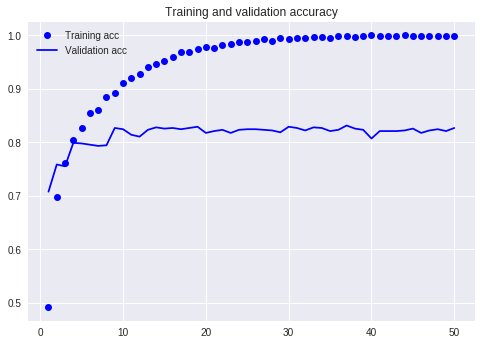

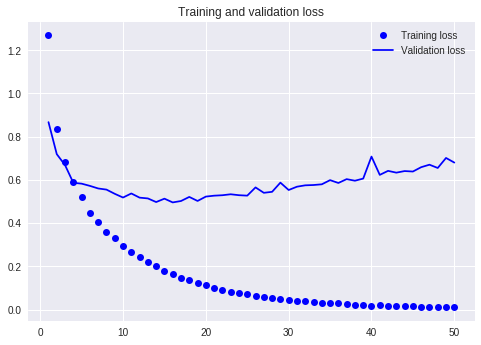

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Transfer learning using data augmentation

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 21,138,757
Non-trainable params: 0
_________________________________________________________________


Freezing vgg16 conv layers

In [0]:
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


Prepare the data

In [0]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=20,
                                                    class_mode='categorical'
                                                    )
validation_generator = test_datagen.flow_from_directory(
                                                  validation_dir,
                                                  target_size=(224, 224),
                                                  batch_size=20,
                                                  class_mode='categorical')

Found 3022 images belonging to 5 classes.
Found 866 images belonging to 5 classes.


In [0]:
model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['acc'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 6,424,069
Non-trainable params: 14,714,688
_________________________________________________________________


#### Save the model after each epoch to avoid loosing all the epochs run before network failure

In [0]:
filepath = '/drive/DeepLearning/flowers/vgg16/vgg16_data_aug_no_fine_tuned_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50, 
                              callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 50s 497ms/step - loss: 1.2460 - acc: 0.5195 - val_loss: 0.9462 - val_acc: 0.6623

Epoch 00001: saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_no_fine_tuned_01_0.66.hdf5
Epoch 2/30
100/100 [==============================] - 47s 470ms/step - loss: 0.9356 - acc: 0.6646 - val_loss: 0.7792 - val_acc: 0.7282

Epoch 00002: saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_no_fine_tuned_02_0.73.hdf5
Epoch 3/30
 55/100 [===============>..............] - ETA: 14s - loss: 0.8012 - acc: 0.7064

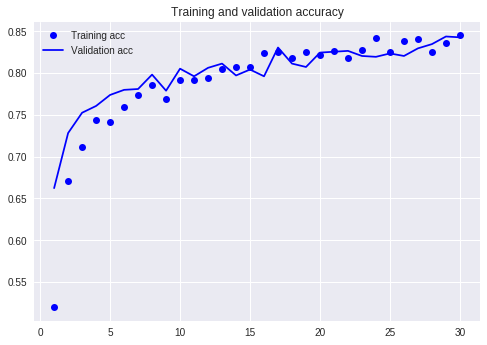

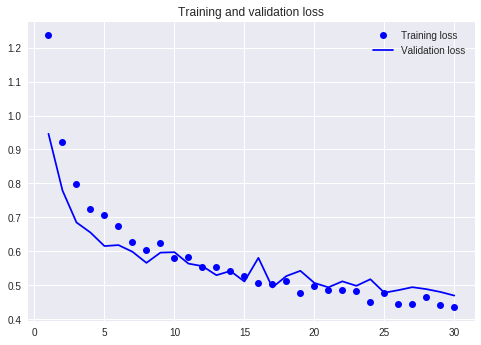

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Fine-tuning vgg16 latest conv layers

In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

Let's the latest conv layer as trainable, meaning that its weight could be updated during the training

In [0]:
conv_base.trainable = True

In [0]:
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else :
    layer.trainable = False

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc']) 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
filepath = '/drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_{epoch:02d}_{val_acc:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, period=1)
callbacks_list = [checkpoint]

In [0]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50,
                             callbacks=callbacks_list)

Epoch 1/100
100/100 [==============================] - 51s 506ms/step - loss: 0.2685 - acc: 0.8990 - val_loss: 0.3767 - val_acc: 0.8631

Epoch 00001: val_acc did not improve from 0.86714
Epoch 2/100
100/100 [==============================] - 48s 483ms/step - loss: 0.2730 - acc: 0.8985 - val_loss: 0.3860 - val_acc: 0.8753

Epoch 00002: val_acc improved from 0.86714 to 0.87525, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_02_0.88.hdf5
Epoch 3/100
100/100 [==============================] - 49s 489ms/step - loss: 0.2665 - acc: 0.8980 - val_loss: 0.3924 - val_acc: 0.8692

Epoch 00003: val_acc did not improve from 0.87525
Epoch 4/100
  5/100 [>.............................] - ETA: 30s - loss: 0.1783 - acc: 0.9300

100/100 [==============================] - 51s 510ms/step - loss: 0.2320 - acc: 0.9045 - val_loss: 0.3243 - val_acc: 0.8854

Epoch 00004: val_acc improved from 0.87525 to 0.88540, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_04_0.89.hdf5
Epoch 5/100
100/100 [==============================] - 49s 486ms/step - loss: 0.2267 - acc: 0.9075 - val_loss: 0.3390 - val_acc: 0.8834

Epoch 00005: val_acc did not improve from 0.88540
Epoch 6/100
 98/100 [============================>.] - ETA: 0s - loss: 0.2238 - acc: 0.9133

100/100 [==============================] - 48s 479ms/step - loss: 0.2224 - acc: 0.9140 - val_loss: 0.3314 - val_acc: 0.8915

Epoch 00006: val_acc improved from 0.88540 to 0.89148, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_06_0.89.hdf5
Epoch 7/100
100/100 [==============================] - 51s 506ms/step - loss: 0.2093 - acc: 0.9270 - val_loss: 0.3242 - val_acc: 0.8793

Epoch 00007: val_acc did not improve from 0.89148
Epoch 8/100
100/100 [==============================] - 48s 482ms/step - loss: 0.2001 - acc: 0.9305 - val_loss: 0.3038 - val_acc: 0.8935

Epoch 00008: val_acc improved from 0.89148 to 0.89351, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_08_0.89.hdf5
Epoch 9/100
  5/100 [>.............................] - ETA: 29s - loss: 0.1813 - acc: 0.9200

100/100 [==============================] - 48s 482ms/step - loss: 0.2039 - acc: 0.9270 - val_loss: 0.3292 - val_acc: 0.8935

Epoch 00009: val_acc did not improve from 0.89351
Epoch 10/100
100/100 [==============================] - 49s 494ms/step - loss: 0.1757 - acc: 0.9355 - val_loss: 0.4505 - val_acc: 0.8742

Epoch 00010: val_acc did not improve from 0.89351
Epoch 11/100
100/100 [==============================] - 47s 474ms/step - loss: 0.1948 - acc: 0.9275 - val_loss: 0.3200 - val_acc: 0.8895

Epoch 00011: val_acc did not improve from 0.89351
Epoch 12/100
 29/100 [=======>......................] - ETA: 21s - loss: 0.1485 - acc: 0.9517

100/100 [==============================] - 48s 479ms/step - loss: 0.1753 - acc: 0.9360 - val_loss: 0.3364 - val_acc: 0.8996

Epoch 00012: val_acc improved from 0.89351 to 0.89959, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_12_0.90.hdf5
Epoch 13/100
100/100 [==============================] - 49s 494ms/step - loss: 0.1716 - acc: 0.9305 - val_loss: 0.3047 - val_acc: 0.8976

Epoch 00013: val_acc did not improve from 0.89959
Epoch 14/100
100/100 [==============================] - 48s 484ms/step - loss: 0.1490 - acc: 0.9445 - val_loss: 0.3187 - val_acc: 0.9047

Epoch 00014: val_acc improved from 0.89959 to 0.90467, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_14_0.90.hdf5
Epoch 15/100


100/100 [==============================] - 48s 478ms/step - loss: 0.1503 - acc: 0.9475 - val_loss: 0.3113 - val_acc: 0.9057

Epoch 00015: val_acc improved from 0.90467 to 0.90568, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_15_0.91.hdf5
Epoch 16/100
100/100 [==============================] - 50s 496ms/step - loss: 0.1339 - acc: 0.9500 - val_loss: 0.4061 - val_acc: 0.8905

Epoch 00016: val_acc did not improve from 0.90568
Epoch 17/100
 97/100 [============================>.] - ETA: 1s - loss: 0.1322 - acc: 0.9443

100/100 [==============================] - 48s 480ms/step - loss: 0.1313 - acc: 0.9445 - val_loss: 0.3452 - val_acc: 0.8955

Epoch 00017: val_acc did not improve from 0.90568
Epoch 18/100
100/100 [==============================] - 48s 478ms/step - loss: 0.1298 - acc: 0.9520 - val_loss: 0.3577 - val_acc: 0.8986

Epoch 00018: val_acc did not improve from 0.90568
Epoch 19/100
100/100 [==============================] - 49s 487ms/step - loss: 0.1264 - acc: 0.9545 - val_loss: 0.3463 - val_acc: 0.9097

Epoch 00019: val_acc improved from 0.90568 to 0.90974, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_19_0.91.hdf5
Epoch 20/100
 33/100 [========>.....................] - ETA: 20s - loss: 0.0917 - acc: 0.9636

100/100 [==============================] - 48s 482ms/step - loss: 0.1036 - acc: 0.9655 - val_loss: 0.3296 - val_acc: 0.8966

Epoch 00020: val_acc did not improve from 0.90974
Epoch 21/100
100/100 [==============================] - 48s 481ms/step - loss: 0.0987 - acc: 0.9645 - val_loss: 0.3310 - val_acc: 0.8976

Epoch 00021: val_acc did not improve from 0.90974
Epoch 22/100
100/100 [==============================] - 48s 483ms/step - loss: 0.1121 - acc: 0.9625 - val_loss: 0.3053 - val_acc: 0.9108

Epoch 00022: val_acc improved from 0.90974 to 0.91075, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_22_0.91.hdf5
Epoch 23/100
 26/100 [======>.......................] - ETA: 22s - loss: 0.0787 - acc: 0.9788

100/100 [==============================] - 48s 483ms/step - loss: 0.0985 - acc: 0.9650 - val_loss: 0.2924 - val_acc: 0.9118

Epoch 00023: val_acc improved from 0.91075 to 0.91176, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_23_0.91.hdf5
Epoch 24/100
100/100 [==============================] - 48s 478ms/step - loss: 0.1075 - acc: 0.9600 - val_loss: 0.3019 - val_acc: 0.9097

Epoch 00024: val_acc did not improve from 0.91176
Epoch 25/100
100/100 [==============================] - 48s 481ms/step - loss: 0.1016 - acc: 0.9655 - val_loss: 0.3497 - val_acc: 0.9026

Epoch 00025: val_acc did not improve from 0.91176
Epoch 26/100
 43/100 [===========>..................] - ETA: 17s - loss: 0.1004 - acc: 0.9593

100/100 [==============================] - 48s 478ms/step - loss: 0.0982 - acc: 0.9630 - val_loss: 0.3731 - val_acc: 0.9047

Epoch 00026: val_acc did not improve from 0.91176
Epoch 27/100
100/100 [==============================] - 48s 479ms/step - loss: 0.0926 - acc: 0.9670 - val_loss: 0.3238 - val_acc: 0.9047

Epoch 00027: val_acc did not improve from 0.91176
Epoch 28/100
100/100 [==============================] - 48s 477ms/step - loss: 0.0854 - acc: 0.9695 - val_loss: 0.3183 - val_acc: 0.8844

Epoch 00028: val_acc did not improve from 0.91176
Epoch 29/100
 34/100 [=========>....................] - ETA: 19s - loss: 0.0963 - acc: 0.9706

100/100 [==============================] - 48s 481ms/step - loss: 0.0994 - acc: 0.9650 - val_loss: 0.3336 - val_acc: 0.9057

Epoch 00029: val_acc did not improve from 0.91176
Epoch 30/100
100/100 [==============================] - 48s 477ms/step - loss: 0.0966 - acc: 0.9675 - val_loss: 0.3542 - val_acc: 0.9026

Epoch 00030: val_acc did not improve from 0.91176
Epoch 31/100
100/100 [==============================] - 48s 475ms/step - loss: 0.0816 - acc: 0.9740 - val_loss: 0.5368 - val_acc: 0.8844

Epoch 00031: val_acc did not improve from 0.91176
Epoch 32/100
 32/100 [========>.....................] - ETA: 20s - loss: 0.0585 - acc: 0.9812

100/100 [==============================] - 48s 478ms/step - loss: 0.0677 - acc: 0.9760 - val_loss: 0.3072 - val_acc: 0.9037

Epoch 00032: val_acc did not improve from 0.91176
Epoch 33/100
100/100 [==============================] - 48s 481ms/step - loss: 0.0754 - acc: 0.9720 - val_loss: 0.3622 - val_acc: 0.8976

Epoch 00033: val_acc did not improve from 0.91176
Epoch 34/100
100/100 [==============================] - 48s 482ms/step - loss: 0.0646 - acc: 0.9790 - val_loss: 0.4515 - val_acc: 0.8895

Epoch 00034: val_acc did not improve from 0.91176
Epoch 35/100
 32/100 [========>.....................] - ETA: 20s - loss: 0.0730 - acc: 0.9781

100/100 [==============================] - 49s 488ms/step - loss: 0.0731 - acc: 0.9780 - val_loss: 0.3600 - val_acc: 0.9108

Epoch 00035: val_acc did not improve from 0.91176
Epoch 36/100
100/100 [==============================] - 48s 480ms/step - loss: 0.0562 - acc: 0.9795 - val_loss: 0.3568 - val_acc: 0.9067

Epoch 00036: val_acc did not improve from 0.91176
Epoch 37/100
100/100 [==============================] - 48s 481ms/step - loss: 0.0631 - acc: 0.9795 - val_loss: 0.4039 - val_acc: 0.8955

Epoch 00037: val_acc did not improve from 0.91176
Epoch 38/100
 32/100 [========>.....................] - ETA: 20s - loss: 0.0720 - acc: 0.9687

100/100 [==============================] - 48s 477ms/step - loss: 0.0791 - acc: 0.9705 - val_loss: 0.3233 - val_acc: 0.9138

Epoch 00038: val_acc improved from 0.91176 to 0.91379, saving model to /drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_38_0.91.hdf5
Epoch 39/100
 60/100 [=================>............] - ETA: 13s - loss: 0.0536 - acc: 0.9817

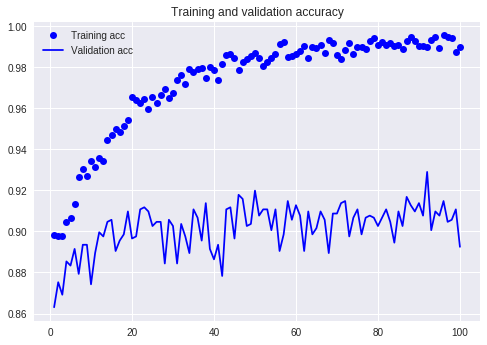

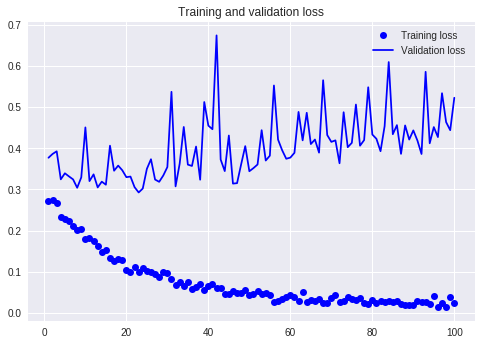

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### Lets load the saved model

In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
model = load_model('/drive/DeepLearning/flowers/vgg16/vgg16_data_aug_and_fine_tuning_92_0.93.hdf5')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 1285      
Total params: 21,138,757
Trainable params: 13,503,493
Non-trainable params: 7,635,264
_________________________________________________________________


In [0]:
from google.colab import files

files.upload()

Saving dandelion.jpeg to dandelion.jpeg


{'dandelion.jpeg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [0]:
from PIL import Image
from keras.preprocessing.image import img_to_array
import numpy as np

def prepare_image(image, target_size):
    # if the image mode is not RGB convert it to RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # resize the input image and preprocess it
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255

    return image


im = prepare_image(Image.open('./dandelion.jpeg'), (224, 224) )

im.shape

(1, 224, 224, 3)

In [0]:
list(model.predict(im)[0])

[1.0627603e-18, 1.0, 2.21117e-15, 3.4681218e-17, 3.5245862e-20]

In [0]:
import keras
keras.__version__

'2.1.6'

In [0]:
test_data = ImageDataGenerator(rescale=1./255)

#test_generator = test_data.flow_from_directory(test_dir,
#                                               target_size=(224, 224),
#                                               class_mode=None,
#                                               shuffle=False)

test_generator = test_data.flow_from_directory(test_dir,
                                                target_size=(224, 224),
                                                batch_size=20,
                                                shuffle=False)


Found 435 images belonging to 5 classes.


In [0]:
test_loss, test_acc = model.evaluate_generator(test_generator)
print('test acc:', test_acc)

test acc: 0.9172413732813692


In [0]:
test_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [0]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [0]:
preds = model.predict_generator(test_generator)

In [0]:
preds.shape

(435, 5)

In [0]:
preds[:10]

array([[1.0000000e+00, 9.2751640e-12, 1.9770810e-15, 8.4052868e-14,
        4.9175616e-20],
       [1.0000000e+00, 1.3455557e-21, 1.2938385e-24, 5.0880459e-19,
        1.6739056e-30],
       [9.9999964e-01, 6.6597835e-08, 1.8005028e-07, 9.0421394e-12,
        1.0984204e-12],
       [1.0000000e+00, 8.9304280e-23, 3.5170105e-28, 7.0163321e-18,
        2.2105860e-32],
       [1.0000000e+00, 2.6056184e-19, 3.0492483e-22, 3.8011338e-17,
        1.2558689e-25],
       [1.0000000e+00, 2.1428164e-19, 1.2400097e-21, 8.3060787e-18,
        3.5393585e-32],
       [9.9688017e-01, 2.7780158e-03, 1.5188707e-06, 3.4022407e-04,
        8.2437807e-10],
       [9.9971300e-01, 2.1103658e-06, 3.8542307e-08, 1.9853245e-04,
        8.6227250e-05],
       [9.9999666e-01, 3.1071099e-06, 2.5238000e-07, 8.7269358e-12,
        1.7682420e-13],
       [1.0000000e+00, 2.5998485e-35, 0.0000000e+00, 1.4842207e-30,
        0.0000000e+00]], dtype=float32)

In [0]:
probs = preds.sum(axis=1)
probs

array([1.        , 1.        , 0.9999999 , 1.        , 1.        ,
       1.        , 0.9999999 , 0.99999994, 1.        , 1.        ,
       1.        , 0.99999994, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       0.99999994, 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.99999994, 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999994, 1.        , 1.        ,
       0.99999994, 1.        , 1.0000001 , 1.        , 1.        ,
       1.0000001 , 1.        , 1.        , 0.9999999 , 1.        ,
       0.99999994, 1.0000001 , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.0000001 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999994, 1.        , 1.        , 1.        , 1.     

In [0]:
from sklearn.metrics import confusion_matrix

y_true = test_generator.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_true, y_pred)

In [0]:
cm

array([[ 71,   4,   1,   0,   1],
       [  1, 101,   1,   0,   3],
       [  1,   2,  68,   3,   5],
       [  0,   1,   0,  73,   0],
       [  3,   3,   6,   1,  86]])

In [0]:
diffs = y_pred==y_true

In [0]:
diffs[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [0]:
img_names = test_generator.filenames
img_names = [test_dir+'/'+ im for im in img_names]

In [0]:
test_dir

'data_flowers/test'

In [0]:
import pandas as pd

In [0]:
dico = {'y_true':y_true, 'y_pred':y_pred, 'is_correct':diffs, 'images':img_names}
mapping = {0:'daisy', 1:'dandelion', 2:'rose', 3:'sunflower', 4:'tulip'}
df = pd.DataFrame(dico).replace({'y_pred':mapping, 'y_true':mapping})

In [0]:
df.head()

images  is_correct y_pred y_true
0  data_flowers/test/daisy/1031799732_e7f4008c03.jpg        True  daisy  daisy
1  data_flowers/test/daisy/10437929963_bc13eebe0c...        True  daisy  daisy
2  data_flowers/test/daisy/10555826524_423eb8bf71...        True  daisy  daisy
3  data_flowers/test/daisy/1140299375_3aa7024466.jpg        True  daisy  daisy
4  data_flowers/test/daisy/11439894966_dca877f0cd...        True  daisy  daisy

In [0]:
df.tail()

images  is_correct y_pred  \
430  data_flowers/test/tulip/8713398906_28e59a225a_...        True  tulip   
431  data_flowers/test/tulip/8759597778_7fca5d434b_...        True  tulip   
432  data_flowers/test/tulip/8838347159_746d14e6c1_...        True  tulip   
433  data_flowers/test/tulip/8838983024_5c1a767878_...        True  tulip   
434  data_flowers/test/tulip/924782410_94ed7913ca_m...        True  tulip   

    y_true  
430  tulip  
431  tulip  
432  tulip  
433  tulip  
434  tulip

In [0]:
incorrect = list(df[df.is_correct==False]['images'].values)
true_labs = list(df[df.is_correct==False]['y_true'].values)
pred_labels = list(df[df.is_correct==False]['y_pred'].values)

In [0]:
len(incorrect)

36

In [0]:
for i in range(5):
  print("flower: ", incorrect[i], ' true ', true_labs[i], ' pred ', pred_labels[i])

flower:  data_flowers/test/daisy/17101762155_2577a28395.jpg  true  daisy  pred  rose
flower:  data_flowers/test/daisy/20182559506_40a112f762.jpg  true  daisy  pred  dandelion
flower:  data_flowers/test/daisy/33810542134_a493f19a71_n.jpg  true  daisy  pred  tulip
flower:  data_flowers/test/daisy/33855966243_01b2486428_n.jpg  true  daisy  pred  dandelion
flower:  data_flowers/test/daisy/34638378196_216d5bbc2e_n.jpg  true  daisy  pred  dandelion


/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


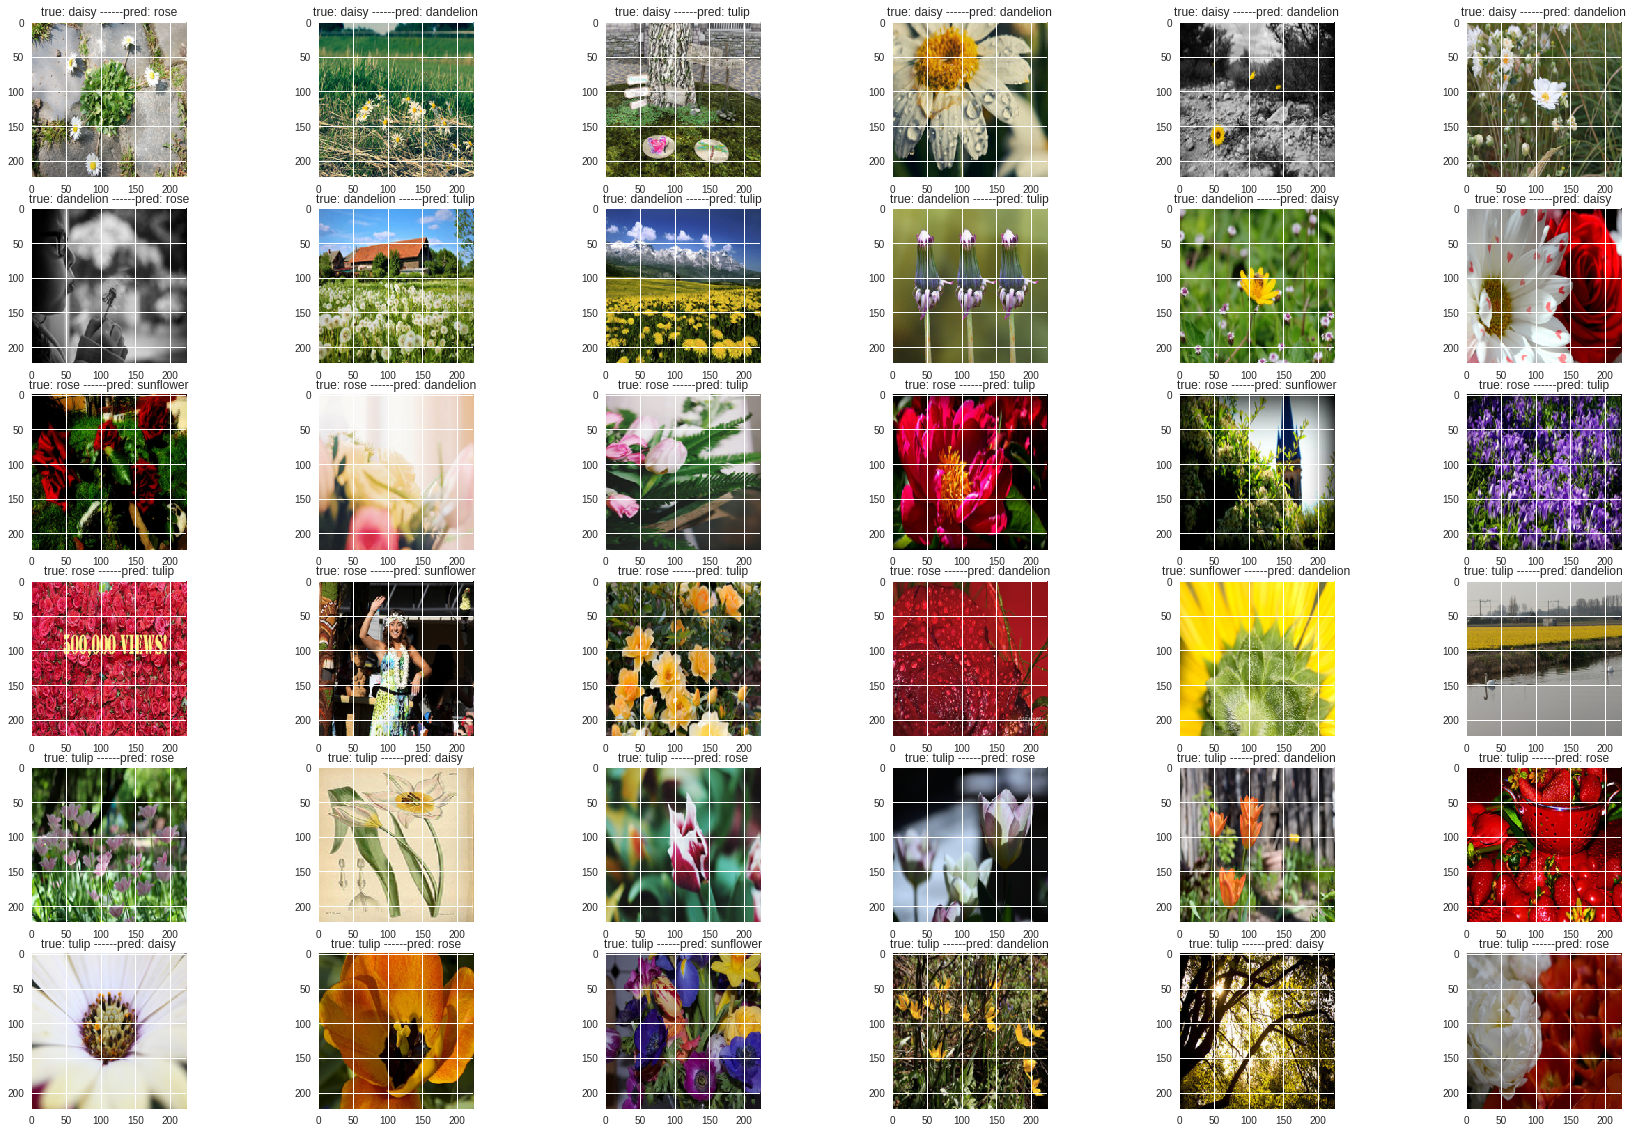

In [0]:
input_shape = (224, 224)

fig, ax = plt.subplots(6,6, figsize=(30,20))
ax = ax.ravel()
for i, im in enumerate(incorrect):
  img=imread(im)
  img = imresize(img,input_shape)
  ax[i].set_title('true: ' + true_labs[i] + ' ------pred: ' + pred_labels[i])
  ax[i].imshow(img)

### Visualize what convnets have learned

In [0]:
from keras.models import load_model
model = load_model('/drive/DeepLearning/flowers/baseline_models/baseline_dropout_and_data_aug_94_0.81.hdf5')

In [0]:
from keras.preprocessing import image
import numpy as np

In [0]:
!ls data_flowers/test/
#11233672494_d8bf0a3dbf_n.jpg

daisy  dandelion  rose	sunflower  tulip


In [0]:
base_dir+'/test_rose_dir/'+os.listdir(test_rose_dir)[0]

'data_flowers/test_rose_dir/12338444334_72fcc2fc58_m.jpg'

In [0]:
img_path = './data_flowers/test/rose/12338444334_72fcc2fc58_m.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
print(img_tensor.shape)

(1, 224, 224, 3)


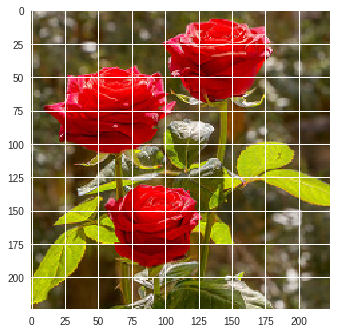

In [0]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)  

(1, 222, 222, 32)


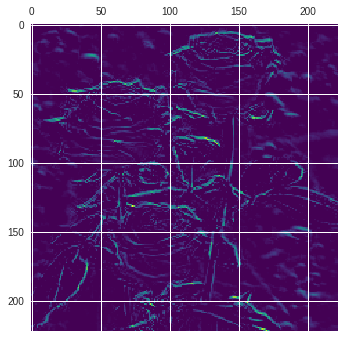

In [0]:
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

In [0]:
layer_names = []
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]
channel_image -= channel_image.mean()
channel_image /= channel_image.std()
channel_image *= 64
channel_image += 128
channel_image = np.clip(channel_image, 0, 255).astype('uint8')
display_grid[col * size : (col + 1) * size,
row * size : (row + 1) * size] = channel_image
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
scale * display_grid.shape[0]))
plt.title(layer_name)
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
!cd data/
!ls

data  datalab


In [0]:
ls /content/data/


samples/  test/  validation/


In [0]:
%%time
import shutil
shutil.make_archive('data', 'zip', '../data/')

CPU times: user 4min 33s, sys: 14.2 s, total: 4min 47s
Wall time: 6min 9s


In [0]:
#!tar -zcvf /drive/DeepLearning/Face_detection/affect_net/affect_net_images.tar.gz /content/data
!cp -R /content/data/ /drive/DeepLearning/Face_detection/affect_net/

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 60602, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil